<a href="https://colab.research.google.com/github/Gayathri-achari/AES/blob/Projects/Disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Random Forest Accuracy: 0.00


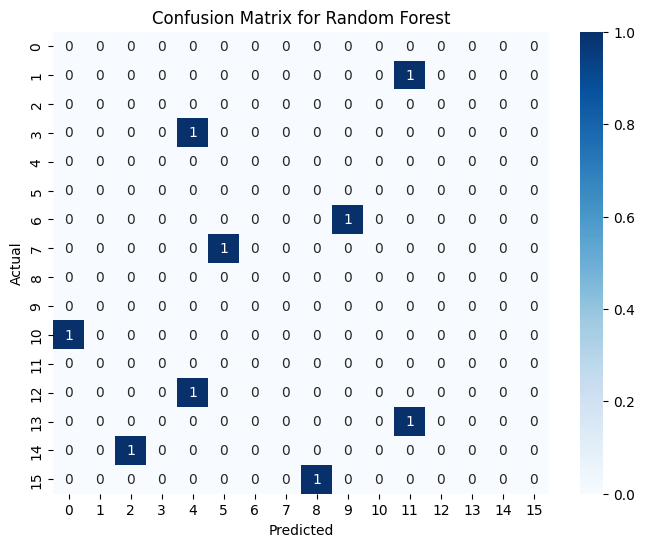

Decision Tree Accuracy: 0.00


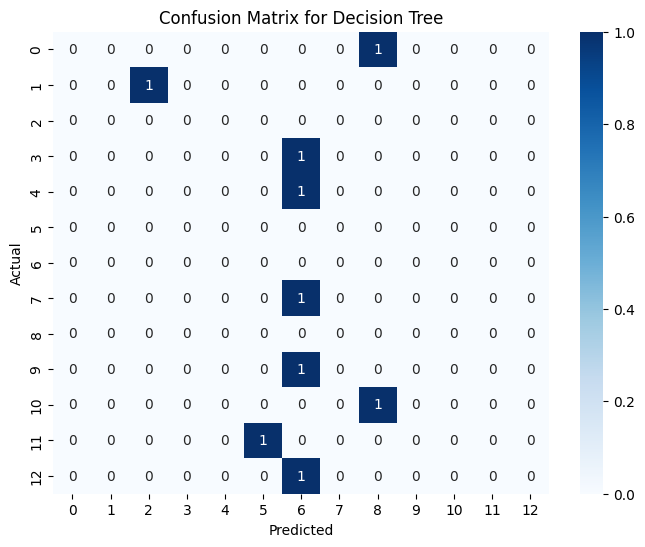

Naive Bayes Accuracy: 0.00


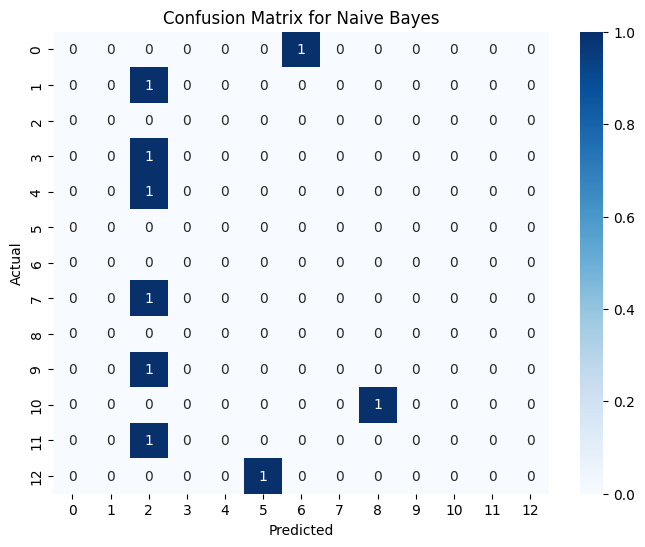

{'Random Forest': 'Fungal infection', 'Decision Tree': 'Fungal infection', 'Naive Bayes': 'Fungal infection'}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/Testing.csv')

# Preprocess the data
encoder = LabelEncoder()
data["Disease"] = encoder.fit_transform(data["Disease"])

# Features and target variable
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Handle missing values
X.fillna(0, inplace=True)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB()
}

# Train and evaluate models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.2f}")

    # Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cf_matrix, annot=True, fmt="d", cmap='Blues')
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Example prediction function
def predict_disease(input_symptoms):
    # Get the list of symptom columns from the original training data X
    symptom_columns = X.columns.tolist()

    # Create an input data array initialized with 0s, with a length equal to the number of symptom columns
    input_data = [0] * len(symptom_columns)

    # Iterate through the input symptoms provided by the user
    for symptom in input_symptoms.split(","):
        # Clean up the symptom string by removing leading/trailing whitespace
        cleaned_symptom = symptom.strip()
        # Check if the cleaned symptom exists in the list of symptom columns
        try:
            # Find the index of the symptom in the symptom_columns list
            symptom_index = symptom_columns.index(cleaned_symptom)
            # Set the corresponding element in input_data to 1
            input_data[symptom_index] = 1
        except ValueError:
            # If the symptom is not found, you might want to add a warning or handle it
            print(f"Warning: Symptom '{cleaned_symptom}' not found in training data.")
            pass # Ignore symptoms not in the training data

    # Convert the input_data list to a numpy array and reshape it for prediction (1 sample, n features)
    input_data_np = np.array(input_data).reshape(1, -1)

    # Scale the input data using the same scaler fitted on the training data
    input_data_scaled = scaler.transform(input_data_np)

    # Get predictions from each trained model
    predictions = {model_name: encoder.inverse_transform([model.predict(input_data_scaled)[0]])[0] for model_name, model in models.items()}

    return predictions

# Example usage
print(predict_disease("itching,skin_Rash,nodal_skin_eruptions"))
